<a href="https://colab.research.google.com/github/LuisGSVasconcelos/Redes_Neurais_PPGEQ_UFCG/blob/main/Cap%C3%ADtulo_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import files
uploaded = files.upload()

# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# IMPORTAÇÃO CORRIGIDA
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV

# Carrega os dados do Excel
dados = pd.read_excel('Folds5x2_pp.xlsx', usecols='A:E').values

# Separa variáveis de entrada (X) e saída (y)
X = dados[:, 0:4]
y = dados[:, 4][:, np.newaxis]

# Gráficos das variáveis de entrada vs saída
plt.figure(), plt.plot(X[:,0], y, '*'), plt.title('AT vs EP')
plt.figure(), plt.plot(X[:,1], y, '*'), plt.title('V vs EP')
plt.figure(), plt.plot(X[:,2], y, '*'), plt.title('AP vs EP')
plt.figure(), plt.plot(X[:,3], y, '*'), plt.title('RH vs EP')

# Divide os dados em treino/teste (80/20)
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=100)

# Divide o treino em estimador e validação (70/30)
X_est, X_val, y_est, y_val = train_test_split(X_treino, y_treino, test_size=0.3, random_state=100)

# Normaliza os dados de entrada
scaler_X = StandardScaler()
X_est_scaled = scaler_X.fit_transform(X_est)
X_val_scaled = scaler_X.transform(X_val)
X_test_scaled = scaler_X.transform(X_teste)

# Normaliza os dados de saída
scaler_y = StandardScaler()
y_est_scaled = scaler_y.fit_transform(y_est)
y_val_scaled = scaler_y.transform(y_val)
y_test_scaled = scaler_y.transform(y_teste)

# Função para criação do modelo
def criar_modelo_oculto(qtd_camadas=1, tamanho_camada=10, valor_regularizacao=0.01, taxa_aprendizado=0.01):
    modelo = Sequential()
    modelo.add(Dense(tamanho_camada, activation='relu', kernel_initializer='he_normal',
                     kernel_regularizer=regularizers.L1(valor_regularizacao),
                     input_shape=(4,)))

    for _ in range(qtd_camadas - 1):
        modelo.add(Dense(tamanho_camada, activation='relu', kernel_initializer='he_normal',
                         kernel_regularizer=regularizers.L1(valor_regularizacao)))

    modelo.add(Dense(1))
    modelo.compile(optimizer=Adam(learning_rate=taxa_aprendizado), loss='mse')
    return modelo

# Substituto de KerasRegressor usando scikeras
modelo_cv = KerasRegressor(model=criar_modelo_oculto,
                           epochs=25, batch_size=50, verbose=0)

# Parâmetros para busca em grade
parametros = {
    "qtd_camadas": [1, 2],
    "tamanho_camada": np.arange(1, 10),
    "valor_regularizacao": [0.001, 0.01, 0.1],
    "taxa_aprendizado": [0.05, 0.01, 0.1]
}

# Grid Search
busca = GridSearchCV(modelo_cv, parametros)
busca.fit(X_est_scaled, y_est_scaled)


print("Melhores parâmetros encontrados:", busca.best_params_)

# Cria o modelo final com EarlyStopping
melhor_modelo = Sequential()
melhor_modelo.add(Dense(20, activation='tanh', kernel_initializer='he_normal', input_shape=(4,)))
melhor_modelo.add(Dense(5, activation='tanh', kernel_initializer='he_normal'))
melhor_modelo.add(Dense(1))
melhor_modelo.compile(loss='mse', optimizer='adam')

es = EarlyStopping(monitor='val_loss', patience=15)

historico = melhor_modelo.fit(X_est_scaled, y_est_scaled, epochs=250, batch_size=32,
                              validation_data=(X_val_scaled, y_val_scaled), callbacks=[es])

# Gráfico de erro
plt.figure()
plt.plot(historico.history['loss'], label='Treino')
plt.plot(historico.history['val_loss'], label='Validação')
plt.title('Curva de validação')
plt.xlabel('Época')
plt.ylabel('MSE')
plt.legend()


KeyboardInterrupt: 

Saving debutanizer_data.txt to debutanizer_data (1).txt
Epoch 1/2000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.6180 - val_loss: 0.0393
Epoch 2/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0339 - val_loss: 0.0331
Epoch 3/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0287 - val_loss: 0.0251
Epoch 4/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0212 - val_loss: 0.0241
Epoch 5/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0199 - val_loss: 0.0219
Epoch 6/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0165 - val_loss: 0.0213
Epoch 7/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0161 - val_loss: 0.0204
Epoch 8/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0177 - val_loss: 0.0199
Epoch 9/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0181 - val_loss: 0.0208
Epoch 10/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0163 - val_loss: 0.0194
Epoch 11/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0153 - val_loss: 0.0188
Epoch 12/2000
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0

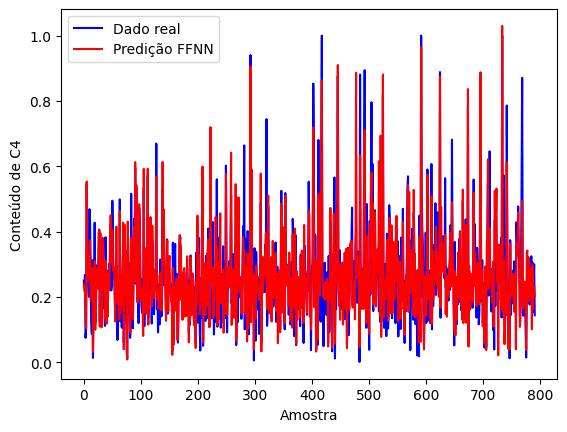

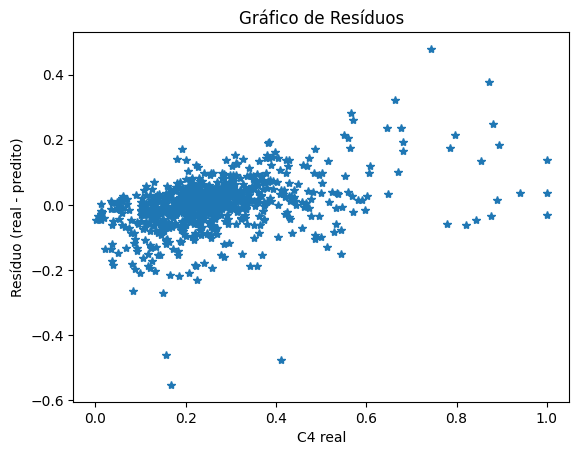

In [9]:
!pip install scikeras

from google.colab import files
uploaded = files.upload()


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Carregamento dos dados do debutanizador
dados = np.loadtxt('debutanizer_data.txt', skiprows=5)
X = dados[:, :-1]
y = dados[:, -1][:, np.newaxis]

# Separação dos dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)
X_est, X_val, y_est, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=100)

# Modelo FFNN
modelo = Sequential()
modelo.add(Dense(60, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.L1(1e-7), input_shape=(X.shape[1],)))
modelo.add(Dense(30, activation='relu', kernel_initializer='he_normal',
                 kernel_regularizer=regularizers.L1(1e-7)))
modelo.add(Dense(1, kernel_regularizer=regularizers.L1(1e-7)))

modelo.compile(loss='mse', optimizer=Adam(learning_rate=0.005))

# Treinamento com EarlyStopping
es = EarlyStopping(monitor='val_loss', patience=200)
historico = modelo.fit(X_est, y_est, epochs=2000, batch_size=32,
                       validation_data=(X_val, y_val), callbacks=[es])

# Predições e visualização
y_pred = modelo.predict(X_test)

plt.figure()
plt.plot(y_test, 'b', label='Dado real')
plt.plot(y_pred, 'r', label='Predição FFNN')
plt.xlabel('Amostra'), plt.ylabel('Conteúdo de C4'), plt.legend()

# Gráfico de resíduos
plt.figure()
plt.plot(y_test, y_test - y_pred, '*')
plt.xlabel('C4 real'), plt.ylabel('Resíduo (real - predito)')
plt.title('Gráfico de Resíduos')

# Métrica de desempenho
print('R² no conjunto de teste:', r2_score(y_test, y_pred))
